In [105]:
import numpy as np
import pandas as pd

from predict import read_all_synthetic_curves

In [78]:
data = pd.read_csv('D:/all_synthetic_well_logs.csv')

#test_curve = curves['1']
#train_curves = pd.concat([curves[k] for k in ['2', '3']])

data.head()

,Unnamed: 0,DTC,DTS,RHOB,depth,well,x,y
0,0,NaN,NaN,NaN,0.00,6782,8476.25,0.0
1,1,NaN,NaN,NaN,1.25,6782,8476.25,0.0
2,2,NaN,NaN,NaN,2.50,6782,8476.25,0.0
3,3,NaN,NaN,NaN,3.75,6782,8476.25,0.0
4,4,NaN,NaN,NaN,5.00,6782,8476.25,0.0


In [79]:
data.well.max()

13601

In [80]:
data.dropna(inplace=True)

In [106]:
#Get a random assortment of data
#Try to predict one single well

test = data[data.well == 1]

In [107]:
train_sample = data[data.well == 1000]

In [52]:
#train_sample = train.sample(100000)

In [108]:
features = ['DTC', 'depth','RHOB', 'x', 'y']
target = ['DTS']

In [109]:
X = train_sample[features]
y = train_sample[target]

In [110]:
from sklearn import linear_model


reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


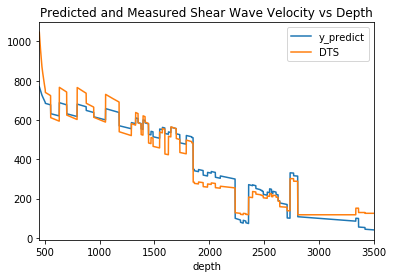

In [115]:
%matplotlib inline

y_test_pred = reg.predict(test[features])
test['y_predict'] = y_test_pred
#test_curve.head()
ax = test[['y_predict', 'DTS', 'depth']].plot(x='depth', title='Predicted and Measured Shear Wave Velocity vs Depth')

In [116]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_pred, test.DTS)

2264.2398213468487

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
import random

perf = []

for x in range(500):
    welln = random.randint(1,13601)
    welln_test = random.randint(1,13601)
    train = data[data.well == welln]
    test = data[data.well == welln]
    X, y = train[features], train[target]
    X_test, y_test = test[features], test[target]
    gbr_reg = GradientBoostingRegressor()
    gbr_reg.fit(X, y.values.ravel())
    perf.append(mean_squared_error(gbr_reg.predict(X_test), y_test.values.ravel()))



(array([ 3.,  7., 31., 34., 57., 71., 82., 45., 38., 26., 19., 15., 18.,
        17., 15.,  9.,  8.,  2.,  1.,  2.]),
 array([0.33826052, 0.54949273, 0.76072494, 0.97195716, 1.18318937,
        1.39442159, 1.6056538 , 1.81688601, 2.02811823, 2.23935044,
        2.45058265, 2.66181487, 2.87304708, 3.08427929, 3.29551151,
        3.50674372, 3.71797593, 3.92920815, 4.14044036, 4.35167258,
        4.56290479]),
 <a list of 20 Patch objects>)

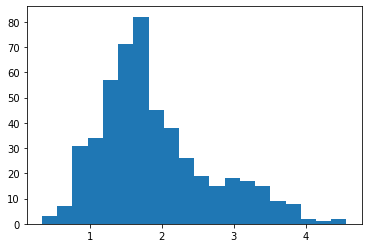

In [128]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(perf, bins=20)


In [137]:
perf= []

for x in range(200):
    welln = random.randint(1,13601)
    welln_test = random.randint(1,13601)
    train = data[data.well == welln]
    test = data[data.well == welln]
    X, y = train[features], train[target]
    X_test, y_test = test[features], test[target]
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X, y.values.ravel())
    perf.append(mean_squared_error(reg.predict(X_test), y_test.values.ravel()))

(array([ 6.,  1., 14., 34., 37., 46., 12., 15., 11.,  4.,  7.,  5.,  0.,
         0.,  0.,  0.,  1.,  3.,  2.,  2.]),
 array([1293.83302875, 1503.44845367, 1713.0638786 , 1922.67930352,
        2132.29472844, 2341.91015337, 2551.52557829, 2761.14100322,
        2970.75642814, 3180.37185306, 3389.98727799, 3599.60270291,
        3809.21812784, 4018.83355276, 4228.44897768, 4438.06440261,
        4647.67982753, 4857.29525246, 5066.91067738, 5276.52610231,
        5486.14152723]),
 <a list of 20 Patch objects>)

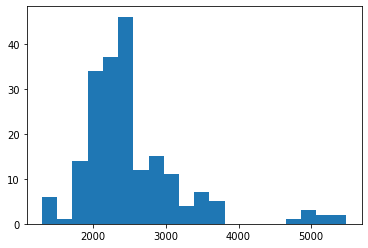

In [138]:
plt.hist(perf, bins=20)

In [139]:
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X, y)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


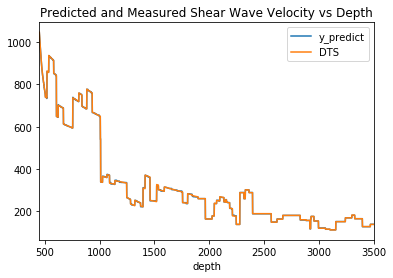

In [131]:
y_test_pred = gbr_reg.predict(test[features])
test['y_predict'] = y_test_pred
#test_curve.head()
test[['y_predict', 'DTS', 'depth']].plot(x='depth', title='Predicted and Measured Shear Wave Velocity vs Depth')

In [134]:
mean_squared_error(y_test_pred, test.DTS)

1.4635329882448918

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


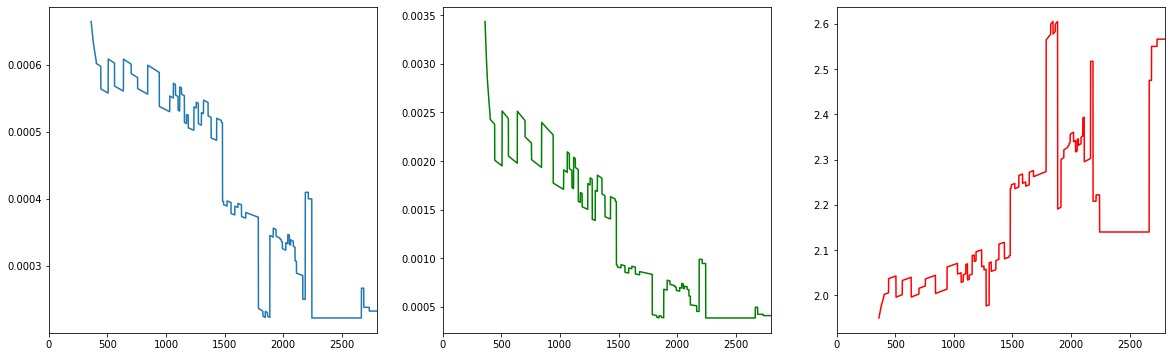

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['1'].DTC.plot(ax=ax1)
curves['1'].DTS.plot(ax=ax2, color='green')
curves['1'].RHOB.plot(ax=ax3, color='red')
fig.show()

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


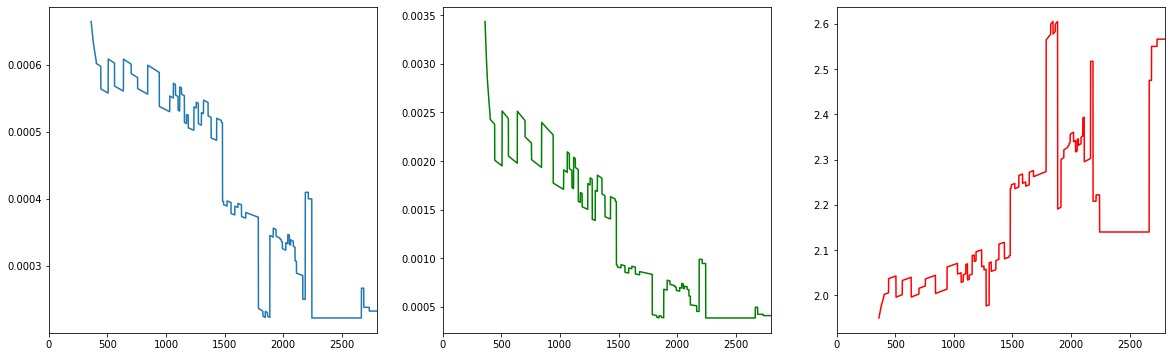

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

curves['2'].DTC.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2, color='green')
curves['2'].RHOB.plot(ax=ax3, color='red')
fig.show()

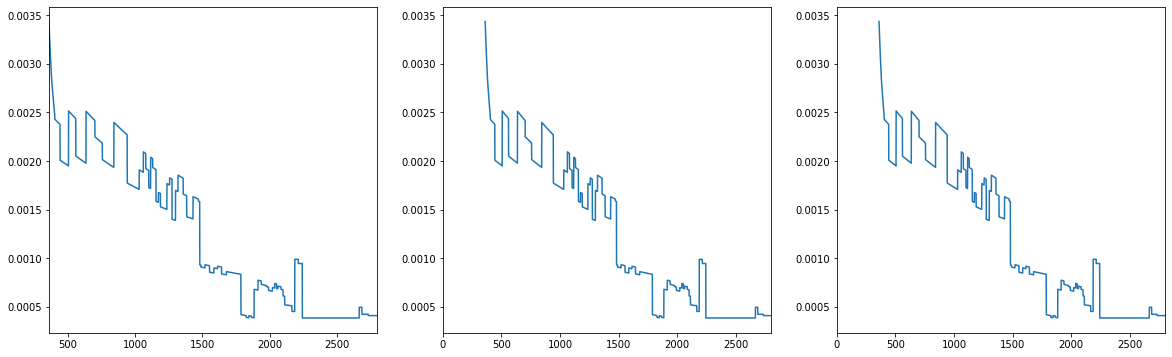

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
curves['1'].DTS.plot(ax=ax1)
curves['2'].DTS.plot(ax=ax2)
curves['3'].DTS.plot(ax=ax3)

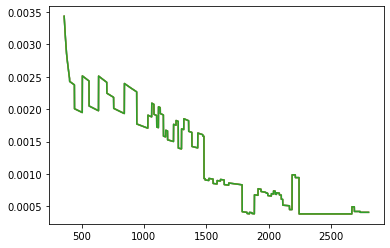

In [55]:
plt.plot(curves['1'].DTS)
plt.plot(curves['2'].DTS)
plt.plot(curves['3'].DTS)

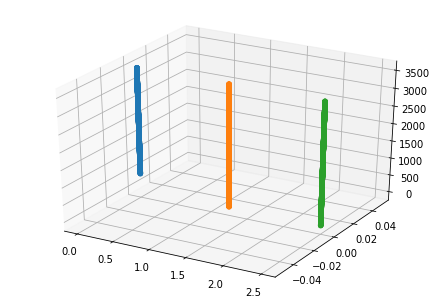

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(curves['1'].x, curves['1'].y, curves['1'].depth)
ax.scatter(curves['2'].x, curves['2'].y, curves['2'].depth)
ax.scatter(curves['3'].x, curves['3'].y, curves['3'].depth)